<a href="https://colab.research.google.com/github/charithcherry/MLnow_2.0/blob/main/LogisticRegression/LoanApproval(P_Charith).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Logistic Regression**

- P Charith (charithcherry1100@gmail.com)


Import necessary libraries

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load The data

In [104]:
loan_data = pd.read_excel('dataset.xlsx')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,Yes,1,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,No,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,NaN,NaN,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [105]:
loan_data.shape

(614, 13)

In [106]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [107]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5399.995114,1621.245798,146.412162,342.00000,0.842199
std,6111.503505,2926.248369,85.587325,65.12041,0.364878
min,3.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [108]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               4
Dependents           16
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

EDA

In [109]:
loan_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

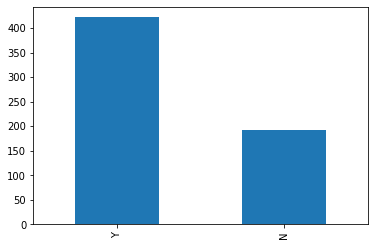

In [110]:
loan_data['Loan_Status'].value_counts().plot.bar()

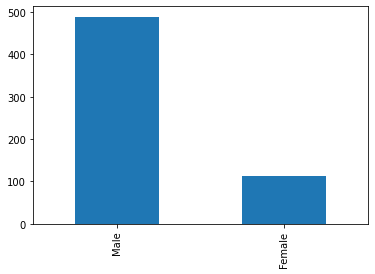

In [111]:
loan_data['Gender'].value_counts().plot.bar()

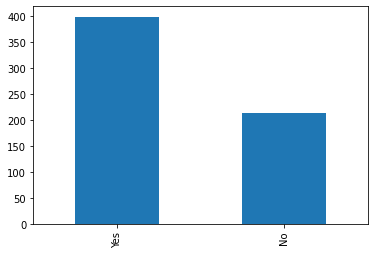

In [112]:
loan_data['Married'].value_counts().plot.bar()

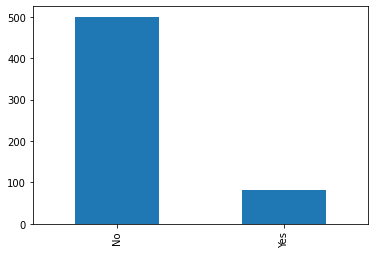

In [113]:
loan_data['Self_Employed'].value_counts().plot.bar()

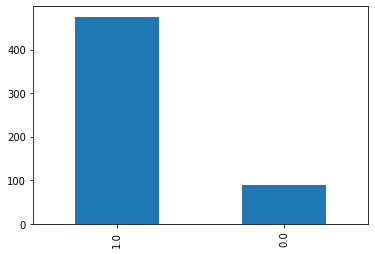

In [114]:
loan_data['Credit_History'].value_counts().plot.bar()

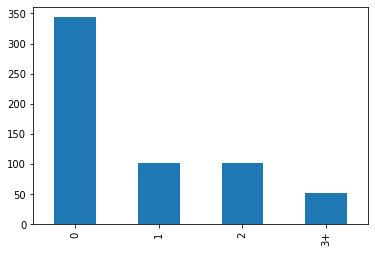

In [115]:
loan_data['Dependents'].value_counts().plot.bar()

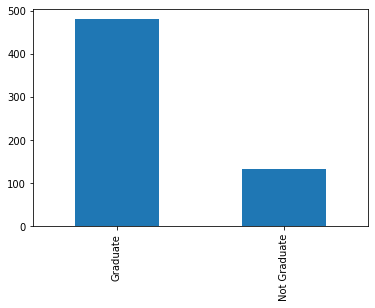

In [116]:
loan_data['Education'].value_counts().plot.bar()

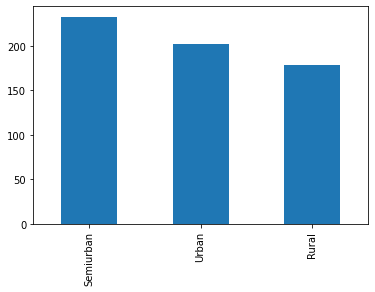

In [117]:
loan_data['Property_Area'].value_counts().plot.bar()

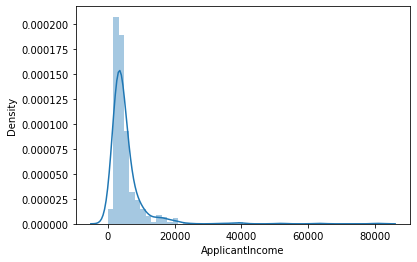

In [118]:
sns.distplot(loan_data['ApplicantIncome'])

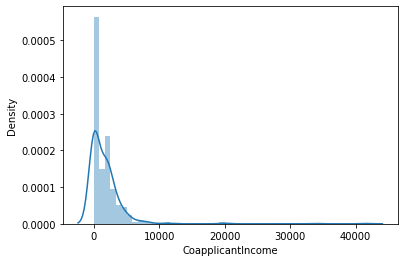

In [119]:
sns.distplot(loan_data['CoapplicantIncome'])

Text(0.5, 0.98, '')

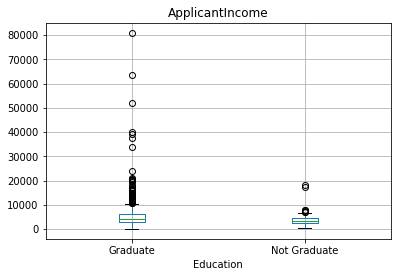

In [120]:
loan_data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle('')

we can observe a lot of outliers where hight number of graduates have high income

Lets consider the hypothesis: Applicants with high incomes should have more chances of loan approval.

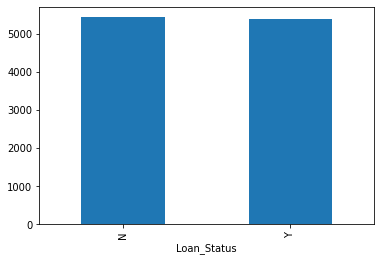

In [121]:
loan_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


We don’t see any change in the mean income. So, let’s make bins for the applicant income variable 

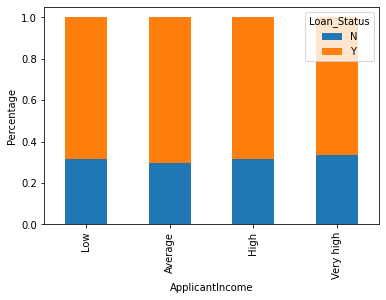

In [122]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Income_bin']=pd.cut(loan_data['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(loan_data['Income_bin'],loan_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')


Applicant's income does not affect the chances of loan approval which contradicts our hypothesis

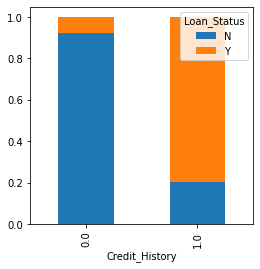

In [123]:
Credit_History=pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

One observation that can be made from the above plot is that people with a credit history as 1 are more likely to get their loans approved.

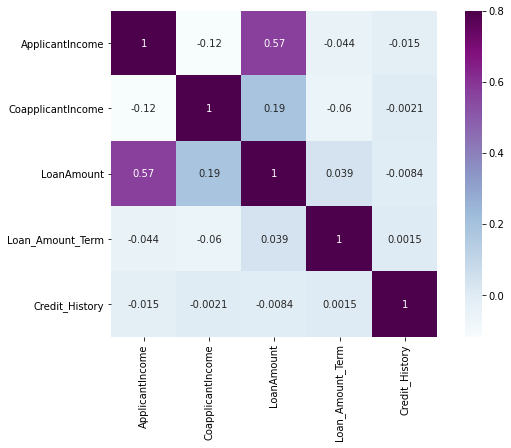

In [124]:
matrix = loan_data.corr()
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

In [125]:
loan_data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

Handling Missing Values



In [126]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

In [127]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mode()[0], inplace=True)

In [128]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [129]:
loan_data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [130]:
loan_data["Married"].unique()

array(['Yes', 'No'], dtype=object)

In [131]:
from sklearn import preprocessing

In [132]:
loan_data['Gender']=preprocessing.OrdinalEncoder().fit_transform(loan_data['Gender'].values.reshape(-1,1))

In [133]:
loan_data['Married']=preprocessing.OrdinalEncoder().fit_transform(loan_data['Married'].values.reshape(-1,1))

In [134]:
loan_data["Credit_History"].replace([np.nan], 0.0, inplace = True)

In [135]:
loan_data["Loan_Amount_Term"].fillna(method = "ffill", inplace = True)

In [136]:
loan_data['Dependents'] = loan_data['Dependents'].apply({'3+':4, 1:1,2:2,0:0}.get)

In [137]:
loan_data['Loan_Status'] = loan_data['Loan_Status'].apply({'Y':1,'N':0}.get)

In [138]:
loan_data['Education'] = loan_data['Education'].apply({'Graduate':1, 'Not Graduate':0}.get)
loan_data['Self_Employed'] = loan_data['Self_Employed'].apply({'No':0, 'Yes':1}.get)
loan_data['Property_Area']=loan_data['Property_Area'].apply({'Urban':0,'Rural':1,'Semiurban':2}.get)

Input variables and Target Variable

In [139]:
X = loan_data[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]]
y = loan_data["Loan_Status"]

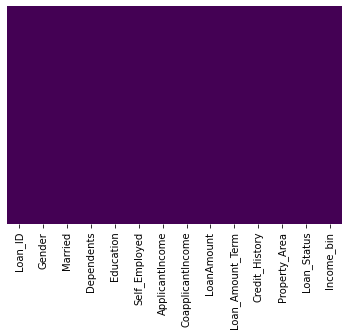

In [140]:
sns.heatmap(loan_data.isnull(),yticklabels=False,cmap='viridis',cbar=False)


## Logistic Regression

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=20)

In [142]:
print("Shape of xtrain:", x_train.shape)
print("Shape of xtest:", x_test.shape)
print("Shape of ytrain:", y_train.shape)
print("Shape of ytest:", y_test.shape)

Shape of xtrain: (429, 11)
Shape of xtest: (185, 11)
Shape of ytrain: (429,)
Shape of ytest: (185,)


In [143]:
y_train

217    1
89     1
379    1
354    1
596    0
      ..
218    0
223    1
271    1
474    1
355    1
Name: Loan_Status, Length: 429, dtype: int64

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

In [145]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predict the model

In [146]:
y_pred = model.predict(x_test)

Accuracy of the model

In [147]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))

Accuracy of model: 76.21621621621621%


In [148]:
classifier = LogisticRegression(random_state=0, solver='liblinear')
classifier = classifier.fit(x_train,y_train)

In [149]:
y_train_pred = classifier.predict(x_train)


In [150]:
y_test_pred = classifier.predict(x_test)


In [151]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train,y_train_pred)
cm_test = confusion_matrix(y_test,y_test_pred)

In [152]:
cm_train

array([[ 57,  66],
       [  7, 299]])

In [153]:
cm_test

array([[ 28,  41],
       [  2, 114]])

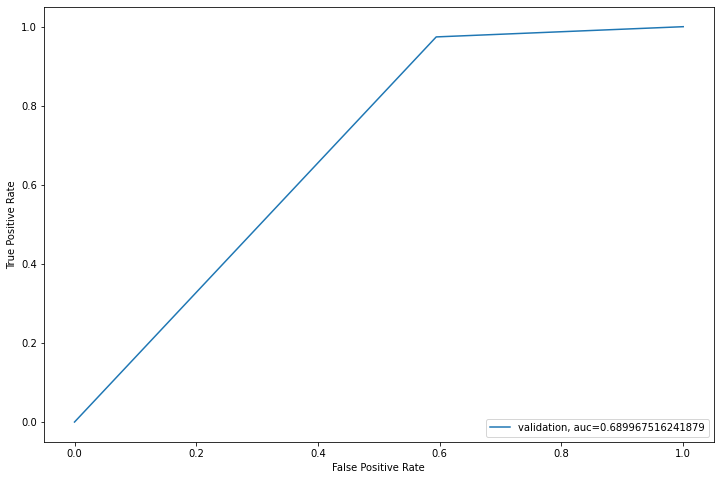

In [154]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()